Predict the percentage of an student based on the no. of study hours. 
This is a simple linear regression task as it involves just 2 variables.

# 1. Setting Up
  - Introduction
  - Loading Libraries
  - Loading Data

# 2. Exploratory Data Analysis(EDA)
  - Data Distribution(Univariate Analysis)
  - Visualization


# 3. Modeling
  - Train-Test Split
  - Simple Logistic Split
  - Prediction and Submission
  - Visulaize and submit the


# Setting Up


## 1.1 Introduction

## 1.2 Loading Libraries

In [1]:
# Data Analysis
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 1.3 Loading Data

In [2]:
raw_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(raw_url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 2. Exploratory Data Analysis(EDA)

## 2.1 Univariate Analysis

As we only have Continous varibles in our Data.

In Univariate Analysis we need to understand **Central Tendency** and **Spread of Data/Measure of Dispersion**, for visualization we can use **Histogram Plot** and **Box Plot**.

To measure Central Tendency and Dispersion we have serval method some are 
Mean, Median, Mode and Range, IQR(Inter Quartile Range), Standard Deviation, Varience etc.

In [3]:
print(f'Size of the data is: {df.shape}')

Size of the data is: (25, 2)


In [4]:
print(f'Type and distribution of Data is: ')
df.info()

Type and distribution of Data is: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Null values
print(f' Sum of Null values in Data:')
df.isnull().sum()

 Sum of Null values in Data:


Hours     0
Scores    0
dtype: int64

In [6]:
# mean, median and mode of Scores
print('Mean',' '*5,df['Scores'].mean())
print('Meidan',' '*5,df['Scores'].median())
print('Mode',' '*5,df['Scores'].mode())

Mean       51.48
Meidan       47.0
Mode       0    30
dtype: int64


In [7]:
# Standard deviation of marks
print('Standard deviation ',df['Scores'].std())

Standard deviation  25.28688724747802


In [8]:
print(f'Descriptive analysis for measuring Central Tendency data is: ')
df.describe()

Descriptive analysis for measuring Central Tendency data is: 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 2.2 Visualizing the Data

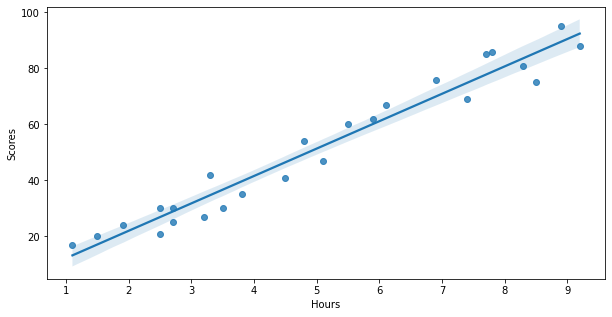

In [9]:
# Relationship between scores and time for outliers
plt.figure(figsize=[10,5])
sns.regplot(x=df['Hours'],y=df['Scores'])
plt.show()

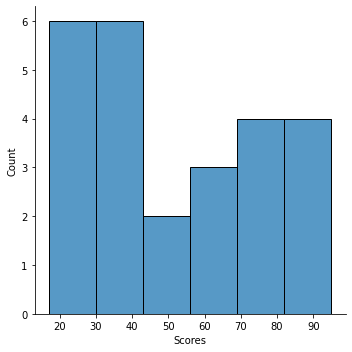

In [10]:
# Distribution of Scores
sns.displot(df['Scores'])

<AxesSubplot:>

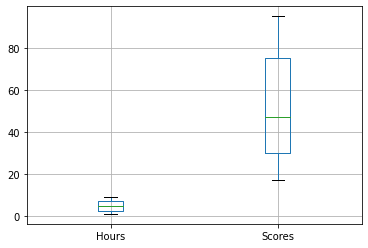

In [11]:
# boxplot fo routliers
df.boxplot()

# Model development and Evaluation 

## 3.1  Train-Test Split


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
# Spliting the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## 3.2 Linear Regression


In [14]:
# Training the model
reg = LinearRegression()
model = reg.fit(X_train,y_train)

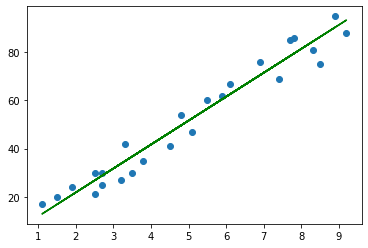

In [15]:
# plot of Training
intercept = model.intercept_
coef = model.coef_

reg_line = intercept+coef*X

plt.scatter(X,y,)
plt.plot(X,reg_line,color='g')
plt.show()

##    Prediction and Submission


In [16]:
# Predicting output
y_pred = model.predict(X_test)

## Evaluating and submition

In [17]:
# Error in prediction 
print(f'Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print(f'r^2 Coefficent of Determination (Best 1): ',r2_score(y_test,y_pred))
print(f'Root Mean Square: ',mean_squared_error(y_test,y_pred))

Mean Absolute Error:  4.130879918502482
r^2 Coefficent of Determination (Best 1):  0.9367661043365056
Root Mean Square:  20.33292367497996


In [18]:
result_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result_df

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


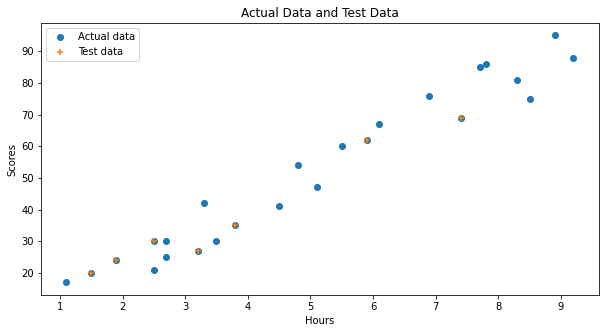

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X,y,label='Actual data')
plt.scatter(X_test,y_test,label='Test data',marker='+')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Actual Data and Test Data")
plt.legend()
plt.show()